In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


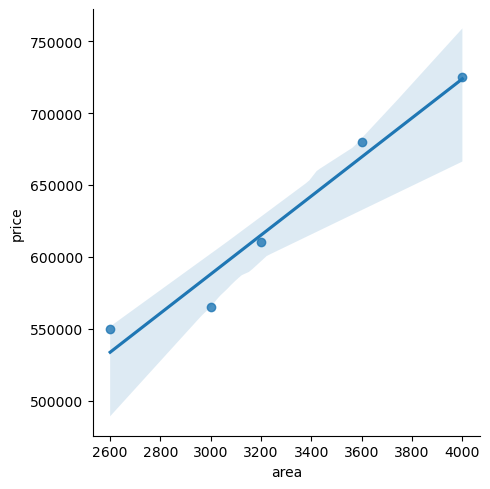

In [41]:
df=pd.read_csv('home_price.csv')
sns.lmplot(x='area',y='price',data=df)

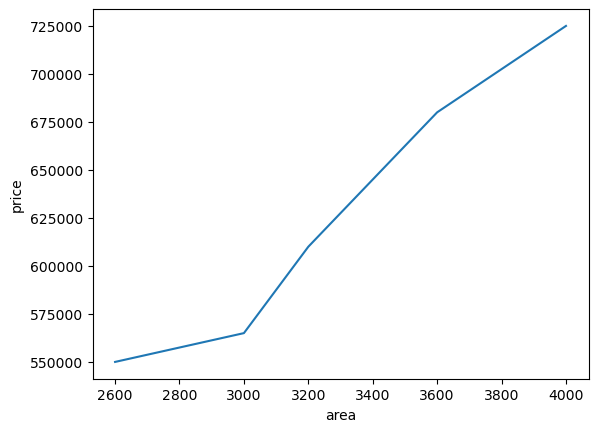

In [42]:
plt.xlabel('area')
plt.ylabel('price')
plt.plot(df.area,df.price)

In [43]:
#create linear regression object
reg =linear_model.LinearRegression()
#fit() in scikit-learn is used to train (fit) a machine learning model to the provided data.
reg.fit(df[['area']],df['price'])

LinearRegression()

In [44]:
reg.predict([[3300]])

/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [45]:
m=reg.coef_
m

array([135.78767123])

In [46]:
b=reg.intercept_
b

180616.43835616432

Y=m*X+b(m is coefficient and b is intercept)

In [47]:
3300*m+b

array([628715.75342466])

In [48]:
print('model accuracy is',reg.score(df[['area']],df['price'])*100)

model accuracy is 95.84301138199486


In [49]:
from sklearn.metrics import r2_score
y_original=df.price
y_predicted=reg.predict(df[['area']])
r_square=r2_score(y_original,y_predicted)
print('model accuracy is',r_square*100)

model accuracy is 95.84301138199486


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train,x_test, y_train, y_test=train_test_split(df['area'],df.price, test_size=.3)

reg.fit(x_train.values.reshape(-1,1),y_train)
y_pred=reg.predict(x_test.values.reshape(-1,1))
r_square=r2_score(y_test,y_pred)
print('model accuracy is',r_square*100)

model accuracy is 85.22171330887412


# Generate CSV file with list of home price predictions

In [65]:
area_df=pd.read_csv("areas.csv")
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [66]:
p=reg.predict(area_df)
p

/Users/rishijaiswal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 342702.7027027 ,  405709.45945946,  506520.27027027,
        662777.02702703,  735864.86486486,  791310.81081081,
        908503.37837838,  652695.94594595,  815253.37837838,
        506520.27027027, 1350810.81081081, 1300405.40540541,
       1111385.13513514])

In [67]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.427027e+05
1,1500,4.057095e+05
2,2300,5.065203e+05
3,3540,6.627770e+05
4,4120,7.358649e+05
5,4560,7.913108e+05
6,5490,9.085034e+05
7,3460,6.526959e+05
8,4750,8.152534e+05
9,2300,5.065203e+05


In [70]:
area_df.to_csv("prediction.csv")
#area_df.to_csv("prediction.csv",index=false)

# Storing Model

In [71]:
import pickle

In [72]:
with open('model_pickle','wb')as file:
    pickle.dump(reg,file)

# Load Saved Model


In [74]:
#open a file named model_picke in binary read mode and storing the model details:
with open('model_pickle','rb')as file:
    mp=pickle.load(file)